In [40]:
# Import the functions to calculate feature descriptors
from skimage.feature import hog
import PIL
from skimage.io import imread
from sklearn.externals import joblib
# To read file names
import glob
import os
import matplotlib.pyplot as plt

In [2]:
pos_im_path = 'pos'
neg_im_path = 'neg'
pos_feat_ph =  "features/pos"
neg_feat_ph =  "features/neg"
model_path= "models/svm.model"

In [3]:
# If feature directories don't exist, create them
if not os.path.isdir(pos_feat_ph):
    os.makedirs(pos_feat_ph)

# If feature directories don't exist, create them
if not os.path.isdir(neg_feat_ph):
    os.makedirs(neg_feat_ph)

Positive features saved in features/pos


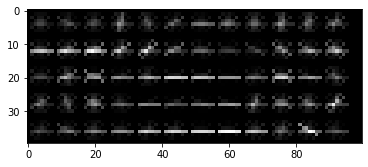

In [42]:
#Calculating the descriptors for the positive samples and saving them
# https://scikit-image.org/docs/0.12.x/api/skimage.feature.html?highlight=feature#skimage.feature.hog
for im_path in glob.glob(os.path.join(pos_im_path, "*")):
    im = imread(im_path)
    #hog parameters:
    """ 1- image => Input image (greyscale).
        2- orientations : int Number of orientation bins.
        3- pixels_per_cell : 2 tuple (int, int) Size (in pixels) of a cell.
        4- cells_per_block : 2 tuple (int,int) Number of cells in each block.
        5- visualise : bool, optional Also return an image of the HOG.
        6- transform_sqrt : bool, optional Apply power law compression to normalise the image before processing. DO NOT use this if the image contains negative values.
        7- feature_vector : bool, optionalReturn the data as a feature vector by calling .ravel() on the result just before returning.
        8- normalise : bool, deprecated

The parameter is deprecated. Use transform_sqrt for power law compression. normalise has been deprecated.
    """
    fd,hog1 = hog(im, orientations=9, pixels_per_cell=[8, 8], cells_per_block=[3, 3],block_norm='L1', visualize=True, transform_sqrt=False, feature_vector=True)
    plt.imshow(hog1,"gray")
    fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
    fd_path = os.path.join(pos_feat_ph, fd_name)
    joblib.dump(fd, fd_path)
print ("Positive features saved in {}".format(pos_feat_ph))


(40, 100)


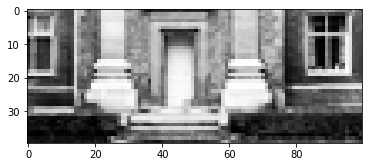

In [41]:
print(im.shape)
plt.imshow(im,"gray")

Calculating the descriptors for the negative samples and saving them
Negative features saved in features/neg


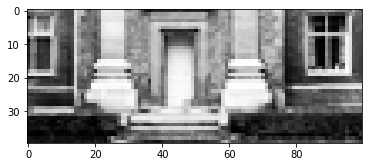

In [43]:
print ("Calculating the descriptors for the negative samples and saving them")
for im_path in glob.glob(os.path.join(neg_im_path, "*")):
    im = imread(im_path)
    fd,hog2 = hog(im, orientations=9, pixels_per_cell=[8, 8], cells_per_block=[3, 3],block_norm='L1', visualize=True, transform_sqrt=False, feature_vector=True)
    plt.imshow(im,"gray")    
    fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
    fd_path = os.path.join(neg_feat_ph, fd_name)
    joblib.dump(fd, fd_path)
print ("Negative features saved in {}".format(neg_feat_ph))

# Training

In [7]:
#from skimage.feature import local_binary_pattern
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [8]:
fds = []
labels = []
# Load the positive features
for feat_path in glob.glob(os.path.join(pos_feat_ph,"*.feat")):
    fd = joblib.load(feat_path)
    fds.append(fd)
    labels.append(1)

print(len(labels)) 

550


In [9]:
# Load the negative features
for feat_path in glob.glob(os.path.join(neg_feat_ph,"*.feat")):
    fd = joblib.load(feat_path)
    fds.append(fd)
    labels.append(0)

print(len(labels)) 

1050


In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(fds), labels, test_size=0.20, random_state=42)


In [11]:
clf = LinearSVC()
print ("Training a Linear SVM Classifier")
clf.fit(trainData, trainLabels)

Training a Linear SVM Classifier


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
clf.score(testData,testLabels)

0.9952380952380953

In [13]:
predictions = clf.predict(testData)
len(predictions)

210

In [15]:
model_path= "models/svm.model"
joblib.dump(clf, model_path)
print ("Classifier saved to {}".format(model_path))

Classifier saved to models/svm.model


# F1 score

In [27]:
#F1 = 2 * (precision * recall) / (precision + recall)
#sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
from sklearn.metrics import f1_score
f1_score(testLabels,predictions)

0.9956709956709957

In [37]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print ('Accuracy:', accuracy_score(testLabels, predictions))
print("----------------------------------------------------------")
print ('F1 score:', f1_score(testLabels, predictions))
print("----------------------------------------------------------")
print ('Recall:', recall_score(testLabels, predictions))
print("----------------------------------------------------------")
print ('Precision:', precision_score(testLabels, predictions))
print("----------------------------------------------------------")
print ('\n clasification report:\n', classification_report(testLabels,predictions))
print("----------------------------------------------------------")
print ('\n confussion matrix:\n',confusion_matrix(testLabels, predictions))

Accuracy: 0.9952380952380953
----------------------------------------------------------
F1 score: 0.9956709956709957
----------------------------------------------------------
Recall: 1.0
----------------------------------------------------------
Precision: 0.9913793103448276
----------------------------------------------------------

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.99      1.00      1.00       115

    accuracy                           1.00       210
   macro avg       1.00      0.99      1.00       210
weighted avg       1.00      1.00      1.00       210

----------------------------------------------------------

 confussion matrix:
 [[ 94   1]
 [  0 115]]
